# Project Title
* "Breast Cancer Classification using Machine Learning Algorithm : Decision Tree, Random Forest, SVM and Naive Bayes"

##Problem Statement:

Breast cancer is one of the most common types of cancer among women worldwide. Early detection and accurate diagnosis are crucial for effective treatment and improving survival rates. This project aims to develop and compare the performance of various machine learning algorithms to classify breast cancer tumors as either malignant or benign. The algorithms include Decision Tree, Random Forest, Support Vector Machine (SVM), Kernel SVM, and Naive Bayes.

The goal is to identify the most effective model for accurate classification, providing insights into the strengths and weaknesses of each algorithm. This will assist medical practitioners in making informed decisions based on the predictions of the models.


##Dataset Overview:
The Breast Cancer Wisconsin (Diagnostic) Dataset will be used for this project. This dataset is well-known and widely used for binary classification tasks. It includes 569 instances of malignant and benign tumors with 30 feature columns that describe various characteristics of the cell nuclei present in the digitized image.

##*Key Features:*
1. ID: Unique identifier for each patient.

2. Diagnosis: Binary classification target, where 'M' denotes malignant and 'B' denotes benign.

3. Features: 30 numeric columns that describe characteristics of the cell nuclei, such as radius, texture, perimeter, area, smoothness, compactness, concavity, concave points, symmetry, and fractal dimension.

##*Example Features:*
4. Radius_mean: Mean of distances from the center to points on the perimeter.

5. Texture_mean: Standard deviation of gray-scale values.

6. Perimeter_mean: Mean size of the core tumor.

7. Area_mean: Mean area of the tumor.

8. Smoothness_mean: Mean of local variation in radius lengths.

In [2]:
import pandas as pd;
import numpy as np;
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
#view the first few rows of the dataset
bc_data = pd.read_csv('/content/Data.csv')
#Encode the target varible: Malignant(M) as 1 and Begin(0)
bc_data['diagnosis']=bc_data['diagnosis'].map({'M':1,'B':0})
#Select feature and target
X = bc_data.drop(columns=['id','diagnosis','Unnamed: 32'])
y = bc_data['diagnosis']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=101)
#Scale the features data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled=scaler.fit_transform(X_test)

Decision tree

In [3]:
from sklearn.tree import DecisionTreeClassifier

# INtialize and train the Decision Tree Model
tree_model = DecisionTreeClassifier(random_state = 101)
tree_model.fit(X_train_scaled,y_train)
#Make prediction on the test data
tree_predictions = tree_model.predict(X_test_scaled)

#EValute the model
print('Decision Tree')
print('Accuracy:',accuracy_score(y_test,tree_predictions))
print("confusion Matrix:\n",classification_report(y_test,tree_predictions))

Decision Tree
Accuracy: 0.9385964912280702
confusion Matrix:
               precision    recall  f1-score   support

           0       0.96      0.94      0.95        72
           1       0.91      0.93      0.92        42

    accuracy                           0.94       114
   macro avg       0.93      0.94      0.93       114
weighted avg       0.94      0.94      0.94       114



#Random Forest

In [4]:
from sklearn.ensemble import RandomForestClassifier

# Initialize and train the Random Forest model
forest_model = RandomForestClassifier(n_estimators=150,
                                      random_state=101)
forest_model.fit(X_train_scaled, y_train)

# Make predictions on the test data
forest_predictions = forest_model.predict(X_test_scaled)

# Evaluate the model
print("Random Forest")
print("Accuracy:", accuracy_score(y_test, forest_predictions))
print("Confusion Matrix:\n", confusion_matrix(y_test, forest_predictions))
print("Classification Report:\n", classification_report(y_test, forest_predictions))

Random Forest
Accuracy: 0.9649122807017544
Confusion Matrix:
 [[70  2]
 [ 2 40]]
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.97      0.97        72
           1       0.95      0.95      0.95        42

    accuracy                           0.96       114
   macro avg       0.96      0.96      0.96       114
weighted avg       0.96      0.96      0.96       114



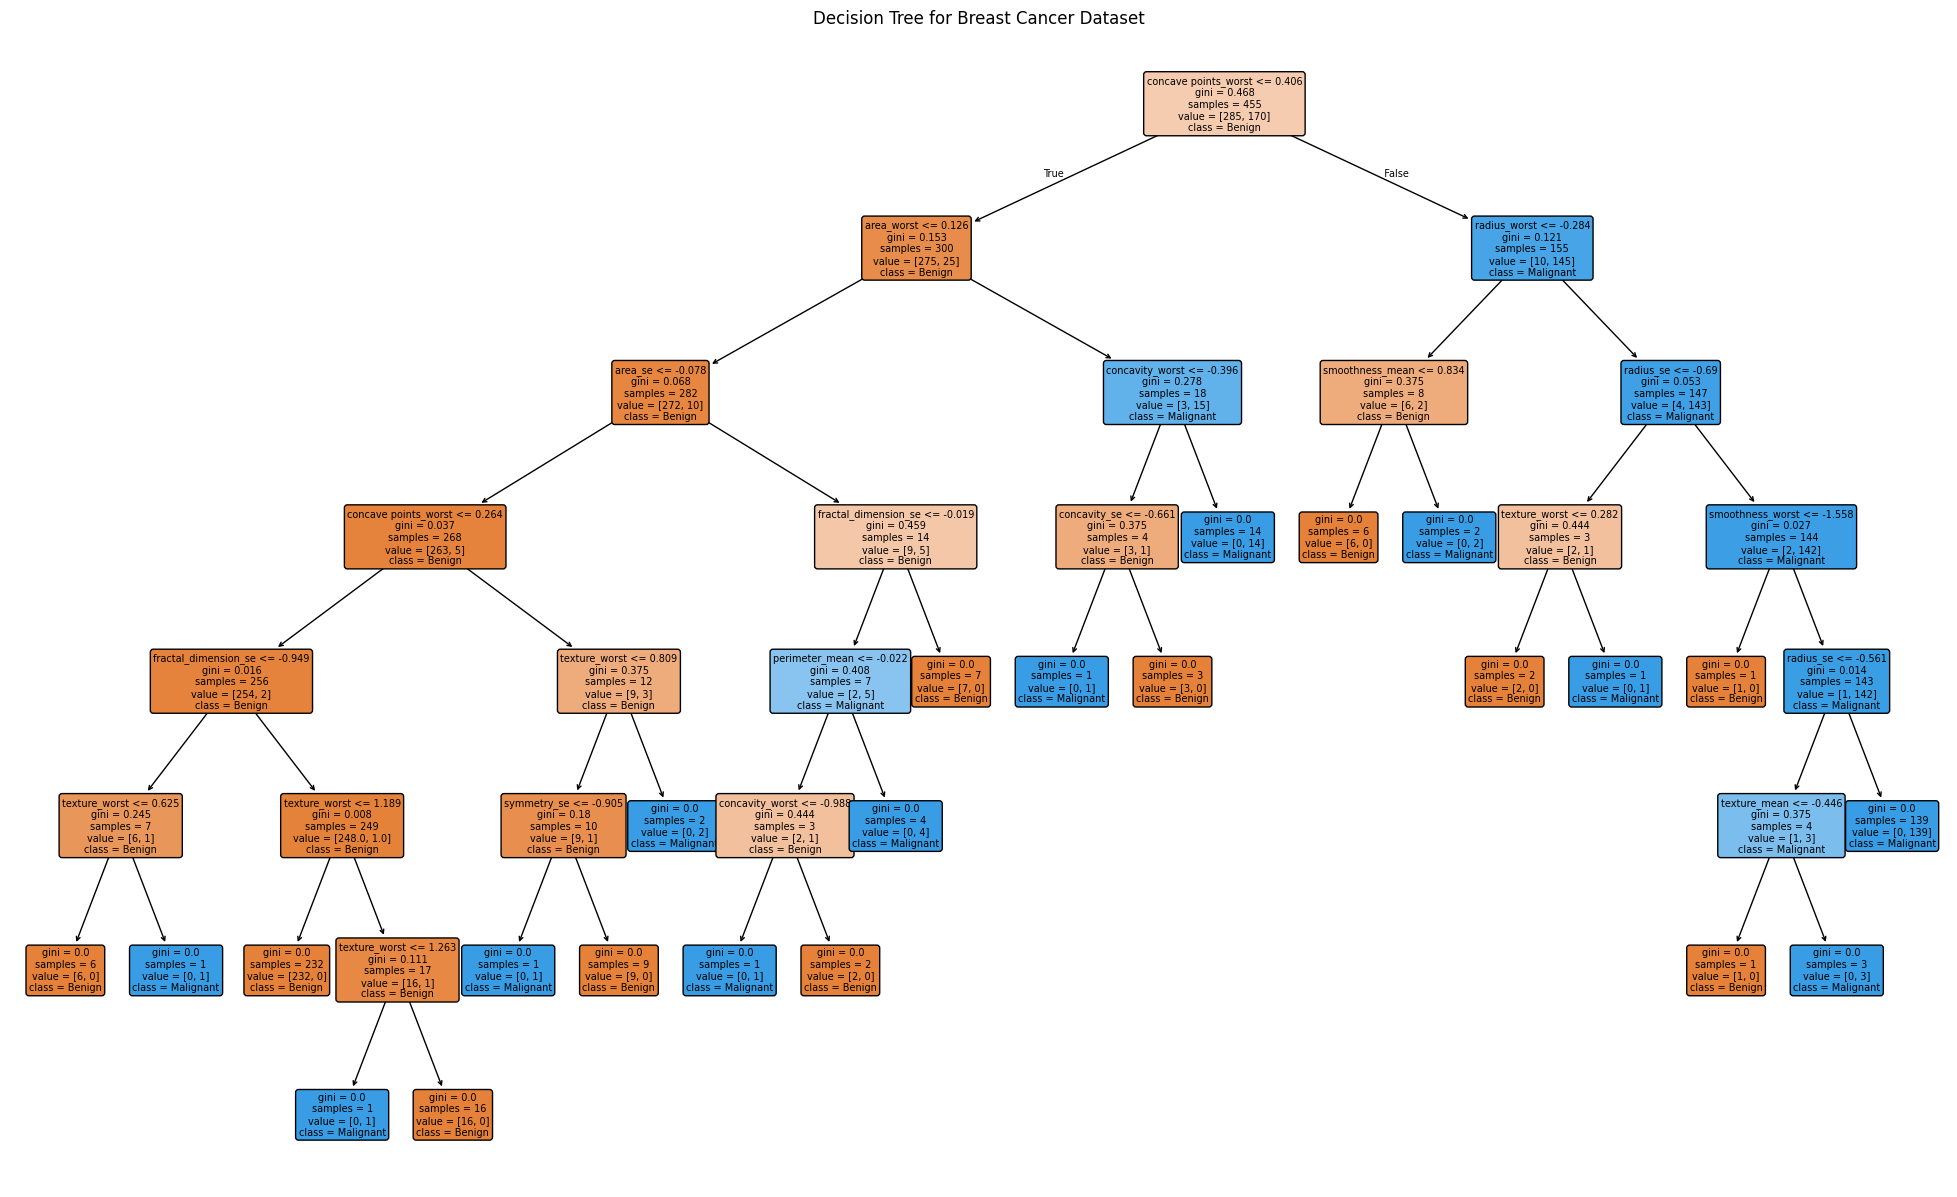

In [5]:
!pip install graphviz

import matplotlib.pyplot as plt
from sklearn.tree import plot_tree #import the plot_tree function
import graphviz

plt.figure(figsize=(25,15))
#use plot_tree to visualize the decision tree
plot_tree(tree_model,  #use the trained decision tree model
          feature_names=X.columns, #use features from X
          class_names=['Benign', 'Malignant'], #Provide readable class names
          filled=True,
          rounded=True,
          fontsize=7)
plt.title("Decision Tree for Breast Cancer Dataset")
plt.show()

#SVM

In [6]:
#SVM

from sklearn.svm import SVC

# Initialize and train the SVM model
svm_model = SVC(kernel='linear', random_state=101)
svm_model.fit(X_train_scaled, y_train)

# Make predictions on the test data
svm_predictions = svm_model.predict(X_test_scaled)

# Evaluate the model
print("SVM")
print("Accuracy:", accuracy_score(y_test, svm_predictions))
print("Confusion Matrix:\n", confusion_matrix(y_test, svm_predictions))
print("Classification Report:\n", classification_report(y_test, svm_predictions))

SVM
Accuracy: 0.9824561403508771
Confusion Matrix:
 [[71  1]
 [ 1 41]]
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99        72
           1       0.98      0.98      0.98        42

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



#Naive Bayes

In [7]:
from sklearn.naive_bayes import GaussianNB

# Initialize and train the Naive Bayes model
nb_model = GaussianNB()
nb_model.fit(X_train_scaled, y_train)

# Make predictions on the test data
nb_predictions = nb_model.predict(X_test_scaled)

# Evaluate the model
print("Naive Bayes")
print("Accuracy:", accuracy_score(y_test, nb_predictions))
print("Confusion Matrix:\n", confusion_matrix(y_test, nb_predictions))
print("Classification Report:\n", classification_report(y_test, nb_predictions))

Naive Bayes
Accuracy: 0.9473684210526315
Confusion Matrix:
 [[69  3]
 [ 3 39]]
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.96      0.96        72
           1       0.93      0.93      0.93        42

    accuracy                           0.95       114
   macro avg       0.94      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114



#final conclosion

Support Vector Machines (SVM) often achieve high accuracy .

1. -> Handles Complex Data: SVMs work well with high-dimensional data (many features) and can separate classes effectively.

2. -> Reduces Overfitting: By focusing on the best boundary (hyperplane) with maximum margin, SVMs avoid overfitting.

3. -> Kernel Trick: This allows SVMs to handle non-linear relationships by transforming data into higher dimensions.

4. -> Maximizes Margin: Ensures the boundary is far from data points, improving generalization to new data.

5. -> Regularization: Controls the balance between fitting the training data and keeping the model simple.

#Result

In [8]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

# Define the parameter grid
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [1, 0.1, 0.01, 0.001],
    'kernel': ['rbf']
}

# Initialize the SVM model
svm_model = SVC(random_state=101)

# Perform grid search
grid_search = GridSearchCV(svm_model, param_grid, refit=True, verbose=2)
grid_search.fit(X_train_scaled, y_train)

# Get the best parameters and estimator
print("Best Parameters:", grid_search.best_params_)
best_svm_model = grid_search.best_estimator_

# Make predictions on the test data
best_svm_predictions = best_svm_model.predict(X_test_scaled)

# Evaluate the model
print("Best SVM Accuracy:", accuracy_score(y_test, best_svm_predictions))
print("Confusion Matrix:\n", confusion_matrix(y_test, best_svm_predictions))
print("Classification Report:\n", classification_report(y_test, best_svm_predictions))

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END ......................C=0.1, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END ......................C=0.1, gamma=0.01